In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

path = "training_data.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)
data = data.drop(['Formation','Well Name'], axis = 1)
data.head()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
772,3,2932.0,67.380,0.391000,-7.600,30.565,2.600,1,0.250
3207,6,3110.5,42.094,1.057000,2.736,4.051,4.500,2,0.847
1865,8,2831.0,31.293,1.000217,-0.100,8.650,4.640,2,0.324
1885,3,2855.0,89.813,0.554000,7.081,14.110,2.963,1,0.932
741,1,2913.5,61.560,0.354000,0.600,17.815,2.800,1,0.396


In [2]:
train_sizes = list(range(1,2560,160))

In [3]:
from sklearn.model_selection import learning_curve
from sklearn import tree
features = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M','RELPOS']
target = 'Facies'
train_sizes, train_scores, validation_scores = learning_curve(estimator = tree.DecisionTreeClassifier(max_depth=10), X=data[features],
                                                             y=data[target], train_sizes=train_sizes, cv=5, scoring='accuracy', shuffle=True)


In [4]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)


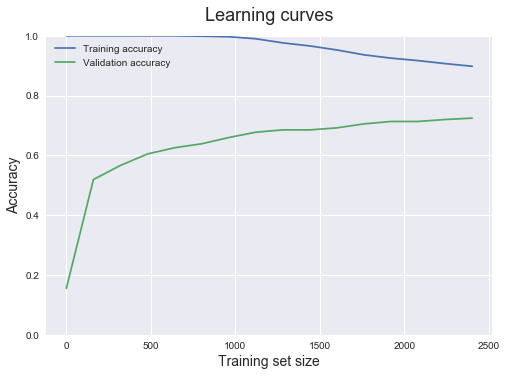

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)

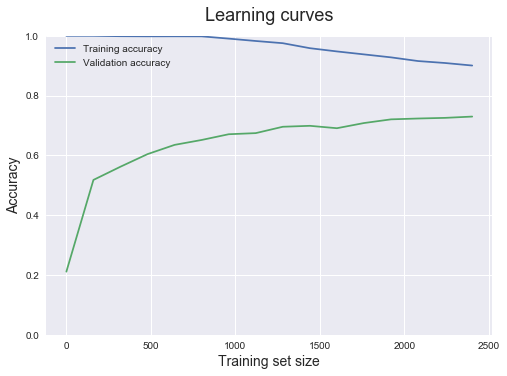

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler


X=data[features]
y=data[target]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

train_sizes, train_scores, validation_scores = learning_curve(estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1),
                                                              X=X, y=data[target], train_sizes=train_sizes, cv=5, scoring='accuracy', shuffle=True)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean)